# Module Title:	Strategic Thinking
### Assessment Title: Strategic Thinking Project
### Lecturer Name: James Garza
### Student Full Name & Number:	Ayllin Bukovic 2023003| Heitor Gomes de Araújo Filho 2023098 | Leandro Boniek Costa Calixto 2023102

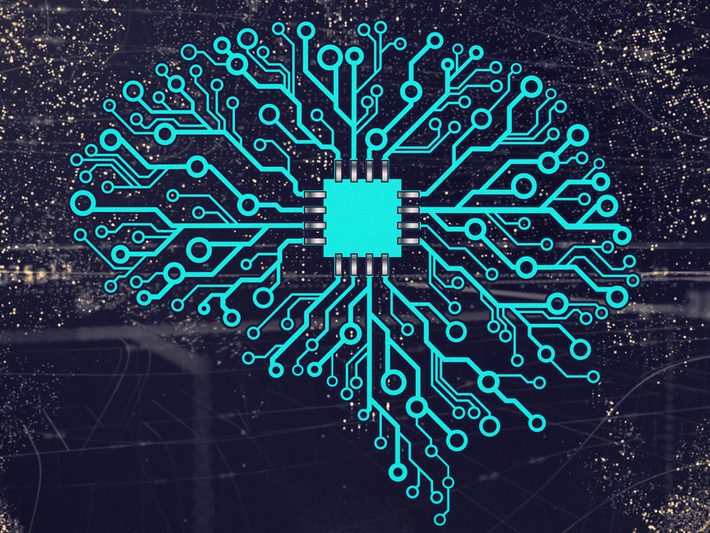

## Table of Contents

## Introduction

<p>This research, in its essence, goes beyond the traditional limits of healthcare analytics. This is the optimal combination of technological advancements and medical knowledge, offering a path forward for the field of predictive healthcare. Our dedication to expanding the realm of healthcare analytics' potential is unrelenting as we set out on this quest to unravel the complexities of stroke prediction. The "Developing a Risk Stroke Classifier Predictive Model" project is an example of how data-driven healthcare innovation may have a revolutionary impact in addition to being a scientific undertaking. Stroke is presently the fifth greatest cause of death in the United States, yet the number of stroke deaths has declined over the past ten years (Guzik and Bushnell, 2017). </p>
<p>Stroke care and diagnosis have been improved due to their detrimental effects on society (Yoo et al., 2012). Caretakers can improve patient management by methodically mining and storing the patient's medical records due to an increasing synergy between technology and medical diagnosis (Alaka et al., 2020). Consequently, it is crucial to investigate how these risk variables interact in patient health records and comprehend how they each contribute differently to stroke prediction (Dev et al., 2022).</p>
<p>A new era of proactive and individualized patient care has been ushered in by the combination of cutting-edge technology and predictive analytics in the quickly changing healthcare scene. At the forefront of this intersection is this project, "Developing a Risk Stroke Classifier Predictive Model," which pioneers the development of a reliable and accurate predictive model for stroke risk assessment by utilizing cutting-edge machine learning techniques, hyperparameter tuning, and cross-validation.</p>
<p>This endeavor is primarily powered by a large dataset called the "Brain Stroke Dataset Classification Prediction." This dataset contains a wide range of attributes that explore the complex network of variables influencing the incidence of strokes. Each data piece, which can include everything from lifestyle preferences and demographic information to medical histories, contains crucial information that is needed to build an advanced prediction model.</p>
<p>The dataset's embedded features provide a clear picture of the complex interactions between the factors that affect the risk of stroke. The dataset offers a rich tapestry of information ranging from age and gender to cardiac disease, hypertension, and lifestyle decisions including smoking habits. The goal is apparent: to extract significant trends and connections from this abundance of information, allowing for the precise categorization of people according to their risk of stroke.</p>
<p>To tackle this challenging problem, five powerful machine learning techniques have been selected: Random Forest Classifier, SVM, Decision Tree, KNN, and Logistic Regression. It becomes clear that hyperparameter adjustment is an important aspect of this effort. We work to maximize the capability of our predictive models by methodically adjusting model parameters, such as tree depth in Random Forest and regularization strength in Logistic Regression. This painstaking fine-tuning procedure is essential to raising the precision and dependability of our forecasts.</p>
<p>The main contribution of this work will be to elucidate in detail the various risk factors for stroke prediction, to contribute even more to preventive strategies for these patients, and help health professionals with a more effective approach. Therefore, for the development of this research, the CRISP-DM methodology is used as the structure to follow, we will explore all the stages below.</p>


## Libraries and Data Importation

The dataset spg.csv can be found on Kaggle, an authentic resource repository, and has 4981 observations and 11 attributes.

In [1]:
#for data analysis
import numpy as np
from numpy import array
from numpy import argmax
import pandas as pd

#for visualistions
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(palette='Paired')

#for data preprocessing and preperation 
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import KFold

#for defining models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#for model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

import warnings
warnings.simplefilter("ignore")

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\lboni\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [2]:
# loading the data into dataframe.
df = pd.read_csv('brain_stroke.csv')

## EDA

In [3]:
df = df.rename(columns={"gender": "Gender", "age": "Age", "hypertension": "Hypertension", "heart_disease": "Heart Disease", "ever_married": "Civil Status","work_type": "Type of work", "Residence_type": "Residence", "avg_glucose_level": "Glucose Level", "bmi": "Body Mass Index", "smoking_status": "Smoking", "stroke": "Stroke" })

In [4]:
#create data dictionary including variable name and data types
data_dict = pd.DataFrame({'Variable': df.columns, 'Data Type': [df[col].dtype for col in df.columns]})

#write variable descriptions
data_dict['Description'] = [
    'Gender of patient\nFemale, Male', 
    'Age of patient (years)', 
    '0 = does not have hypertention\n1 = has hypertension',
    '0 = does not have hear disease\n1 = has heart disease',
    'Marriage History\nYes(been or is married)\nNo(never married)',
    'Type of Work-\nPrivate: work for private firm\nSelf-employed\nGovt_job: work for government\nchildren: is a child (no work)',
    'Type of Residence Area\nUrban, Rural',
    'Average Glucose Level of patient (mg/dL)',
    'Body Mass Index',
    'Smoking Status of patient\nSmokes, Unknown, Former Smoker, Never Smoked',
    'Stroke History\n0 = has not had a stroke\n1 = has had a stroke'
]

#increase column width so that all texts show
data_dict = data_dict.style.set_properties(subset=['Description'], **{'width': '600px'}) 
data_dict #display dataframe

In [5]:
df.head()

Gender   Age  Hypertension  Heart Disease Civil Status   Type of work  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence  Glucose Level  Body Mass Index          Smoking  Stroke  
0     Urban         228.69             36.6  formerly smoked       1  
1     Rural         105.92             32.5     never smoked       1  
2     Urban         171.23             34.4           smokes       1  
3     Rural         174.12             24.0     never smoked       1  
4     Urban         186.21             29.0  formerly smoked       1

In [6]:
df.shape
print('The dataset original shape: ', df.shape) 

The dataset original shape:  (4981, 11)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4981 non-null   object 
 1   Age              4981 non-null   float64
 2   Hypertension     4981 non-null   int64  
 3   Heart Disease    4981 non-null   int64  
 4   Civil Status     4981 non-null   object 
 5   Type of work     4981 non-null   object 
 6   Residence        4981 non-null   object 
 7   Glucose Level    4981 non-null   float64
 8   Body Mass Index  4981 non-null   float64
 9   Smoking          4981 non-null   object 
 10  Stroke           4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [8]:
df.isna().sum()

Gender             0
Age                0
Hypertension       0
Heart Disease      0
Civil Status       0
Type of work       0
Residence          0
Glucose Level      0
Body Mass Index    0
Smoking            0
Stroke             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

Age  Hypertension  Heart Disease  Glucose Level  \
count  4981.000000   4981.000000    4981.000000    4981.000000   
mean     43.419859      0.096165       0.055210     105.943562   
std      22.662755      0.294848       0.228412      45.075373   
min       0.080000      0.000000       0.000000      55.120000   
25%      25.000000      0.000000       0.000000      77.230000   
50%      45.000000      0.000000       0.000000      91.850000   
75%      61.000000      0.000000       0.000000     113.860000   
max      82.000000      1.000000       1.000000     271.740000   

       Body Mass Index       Stroke  
count      4981.000000  4981.000000  
mean         28.498173     0.049789  
std           6.790464     0.217531  
min          14.000000     0.000000  
25%          23.700000     0.000000  
50%          28.100000     0.000000  
75%          32.600000     0.000000  
max          48.900000     1.000000

In [11]:
df.describe(include=['object'])

Gender Civil Status Type of work Residence       Smoking
count     4981         4981         4981      4981          4981
unique       2            2            4         2             4
top     Female          Yes      Private     Urban  never smoked
freq      2907         3280         2860      2532          1838

In [12]:
#make list of all numerical columns
num_cols = df.select_dtypes(include ='float').keys()
num_cols

Index(['Age', 'Glucose Level', 'Body Mass Index'], dtype='object')

In [13]:
#make list of categorical columns with the object datatype
cat_cols_object = df.select_dtypes(include ='object' or 'int64').keys()
cat_cols_object

Index(['Gender', 'Civil Status', 'Type of work', 'Residence', 'Smoking'], dtype='object')

In [14]:
#make list of categorical columns with the integer datatype
cat_cols_binary = df.select_dtypes(include = 'int64').keys()
cat_cols_binary

Index(['Hypertension', 'Heart Disease', 'Stroke'], dtype='object')

In [15]:
#make list of all categorical columns
cat_variables = cat_cols_object.append(cat_cols_binary)
cat_variables

Index(['Gender', 'Civil Status', 'Type of work', 'Residence', 'Smoking',
       'Hypertension', 'Heart Disease', 'Stroke'],
      dtype='object')

#### Categorical Variables Analysis

During this first stage of analysis, we will focus mainly on an depth analysis of the categorical variables that are included in our dataset. We want to explore every aspect of these classification characteristics and carefully examine the distribution of the dependent variable in each individual category. Through this methodical investigation, we want to gain a quick understanding of any relationships that might exist between different factors and the probability that a person will suffer a stroke. This methodical examination of categorical variables is an essential first step in our effort to identify the patterns and the relationships that might be present in our data, which will help us to develop a more comprehensive knowledge of the variables affecting the risk of strokes.

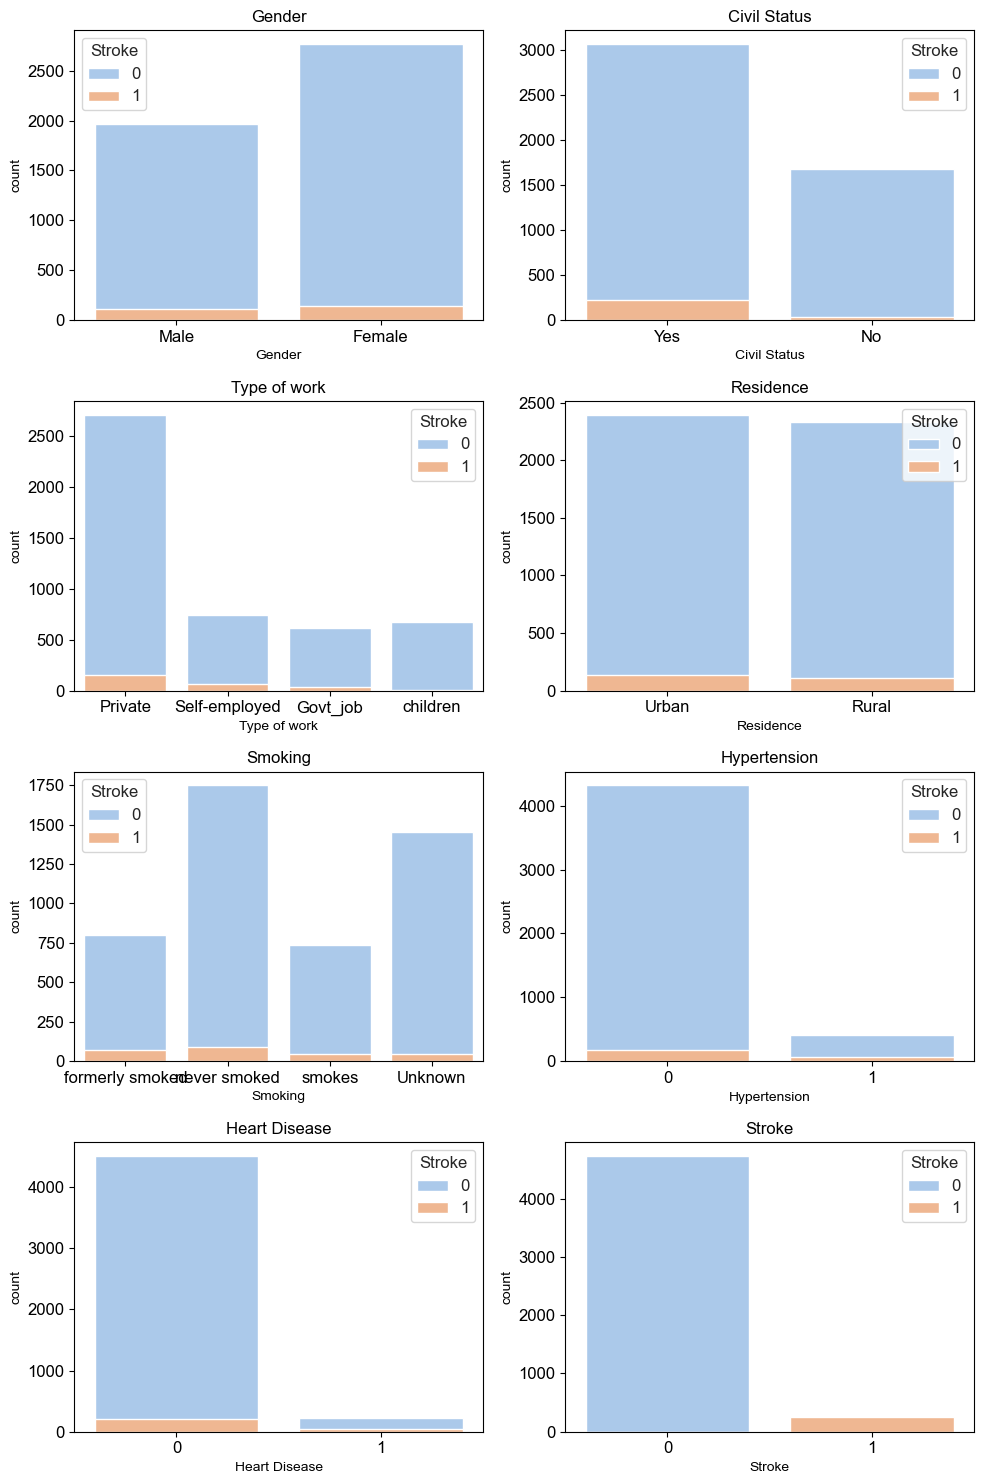

In [16]:
# Define the font size
font_size = 12

# Define the 'Icefire' color palette
custom_palette = sns.color_palette("pastel")

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))  # Define subplot parameters
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate over

# Set the style
sns.set(style="whitegrid")

# Iterate over each categorical column of the dataframe, creating a subplot
for i, col in enumerate(df[cat_variables]):
    sns.countplot(x=col, hue='Stroke', data=df, ax=axes[i], dodge=False, palette=custom_palette)

    # Set the title and font size
    axes[i].set_title(col, fontsize=font_size)

    # Set the label font size for the x and y axis
    axes[i].tick_params(axis='x', labelsize=font_size)
    axes[i].tick_params(axis='y', labelsize=font_size)

    # Set the legend font size
    legend = axes[i].get_legend()
    for text in legend.get_texts():
        text.set_fontsize(font_size)

plt.tight_layout()  # Fix layout
plt.show()  # Display subplots

* Graphic 1: Gender Proportion

It is clear from the bar graphs that our data clearly shows a higher proportion of women. The percentage of strokes by gender is shown as well in the graphs, with a slightly greater percentage in women. This could be as a result of the higher number of female data points.

* Graphic 2: Civil Status

It is evident that a significantly higher proportion of individuals in our data are married or have been married. It's interesting that there are more stroke cases in this group. The results we found suggest that there may be a relationship between being married and the risk of suffering a stroke. These basic observations help in our understanding of the patterns seen in our data and set the groundwork for more thorough investigations that will help us understand the reasons behind these associations.

* Graphic 3: Type of work

The majority of the people included in our dataset are working in the private sector, which represents an important portion of the total population. Interestingly, there seems to be an increased risk of stroke episodes in this particular occupational group. Next in our occupational ladder are the self-employed, who are in close following that, and then there's the non-working children, who represent another defined group. On the other hand, those who work for the government become the minority in this situation. It's important to remember that pediatric stroke cases are extremely rare, which gives the dataset an extra dimension.

* Graphic 4: Residence Urban or Rural

If we see the Urban or Rural Status, the is very similar amount of people living in both areas, and that is why the distribution of stroke events seems to indicate this same equilibrium, suggesting that there is no apparent relationship between the geographic location of our samples and the frequency of stroke occurrences. Basically, living in a busy city or a quiet rural area does not seem to have an impact on the chance of having a stroke, which is an interesting finding about the lack of relationship between residence and stroke episodes in our dataset.

* Graphic 5: Smoking Status

if we analyze the details of the smoking behaviours observed in our database, a clear trend becomes apparent, an important number of people categorically belong to the non smoking group. Remarkably, there are almost equal numbers of people who have quit smoking and those who still smoking. But there is an interesting twist, a significant number of the people decided not to answer when asked about their smoking habits. This adds an element of uncertainty and highlights how difficult it is to understand every aspect of smoking behaviors in our dataset. After first glance, one could be think that the stroke incidents occur in a relatively uniform manner for all smoking categories, offering little evidence that smoking behaviours may be closely associated with the risk of having a stroke. However, this superficial observation invites more investigation to reveal possible details hidden by the first impressions.

* Graphic 6: Hypertension Status

We observe that the vast majority of people do not suffer from hypertension. It is interesting to observe that stroke events appear to happen similarly regardless of a history of hypertension, which raises initial concerns regarding the relationship between hypertension and the probability of a stroke.

* Graphic 7: Heart Disease

There is a pattern that we can see in our dataset when we study heart disease status. It becomes clear that a large number of people show no unusual characteristics or problems in their hearts. It's interesting to note that stroke events are seen to occur in both cases, despite a general absence of cardiac irregularities. This interesting finding raises more questions about the relationship between heart health and the incidence of strokes. While the majority might not exhibit obvious heart disease symptoms, the fact that strokes occur in this context adds a level of complexity to our comprehension of the many variables influencing stroke events in our dataset.

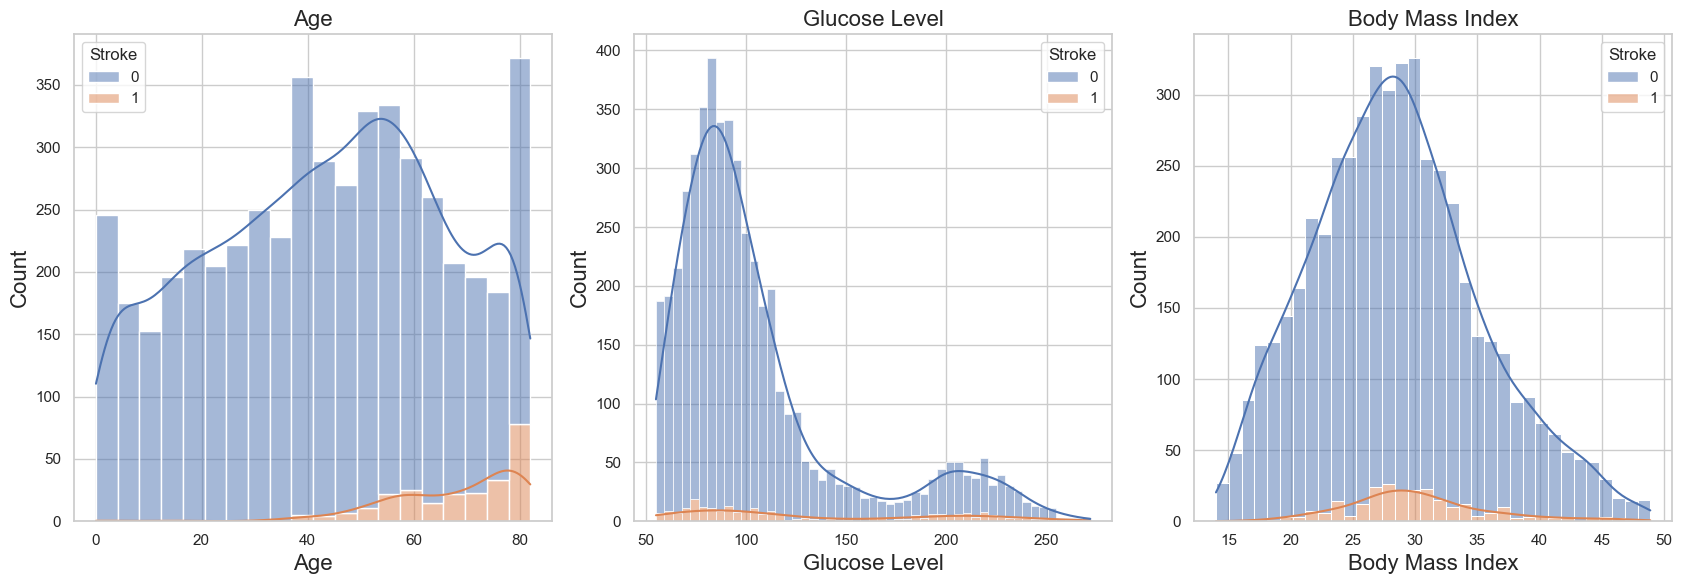

In [17]:
# Define the color palette as 'icefire'
sns.set_palette("pastel")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 6))  # Define subplot parameters
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate over

# Set the style
sns.set(style="whitegrid")

# Iterate over each numerical column of the dataframe, creating a subplot
for i, col in enumerate(df[num_cols]):
    sns.histplot(x=col, hue='Stroke', data=df, ax=axes[i], kde=True, multiple='stack')
    axes[i].set_title(col, fontsize=16)  

    # Set the label font size for the x and y axis
    axes[i].set_xlabel(col, fontsize=16)
    axes[i].set_ylabel('Count', fontsize=16)

plt.tight_layout()  # Fix layout
plt.show()  # Display subplots

In [18]:
#Counting total between 30 and 40
Age_stroke_30to40 = df[(df['Age'] >= 30) & (df['Age'] < 40)]
total_people_30to40 = len(Age_stroke_30to40)

#Filter the stroke condition
stroke_people_30to40 = len(Age_stroke_30to40[Age_stroke_30to40['Stroke'] == 1])

#Ratio
stroke_30to40 = stroke_people_30to40 / total_people_30to40

print(f"Total people 30-40: {total_people_30to40}")
print(f"Total people stroke 30-40: {stroke_people_30to40}")
print(f"Ratio stroke 30-40: {stroke_30to40:.2%}")

Total people 30-40: 640
Total people stroke 30-40: 6
Ratio stroke 30-40: 0.94%


In [19]:
#Counting total between 60 and 80
Age_stroke_60to80 = df[(df['Age'] >= 60) & (df['Age'] < 80)]
total_people_60to80 = len(Age_stroke_60to80)

#Filter the stroke condition
stroke_people_60to80 = len(Age_stroke_60to80[Age_stroke_60to80['Stroke'] == 1])

#Ratio
stroke_60to80 = stroke_people_60to80 / total_people_60to80

print(f"Total people 60-80: {total_people_60to80}")
print(f"Total people stroke 60-80: {stroke_people_60to80}")
print(f"Ratio stroke 60-80: {stroke_60to80:.2%}")

Total people 60-80: 1180
Total people stroke 60-80: 141
Ratio stroke 60-80: 11.95%


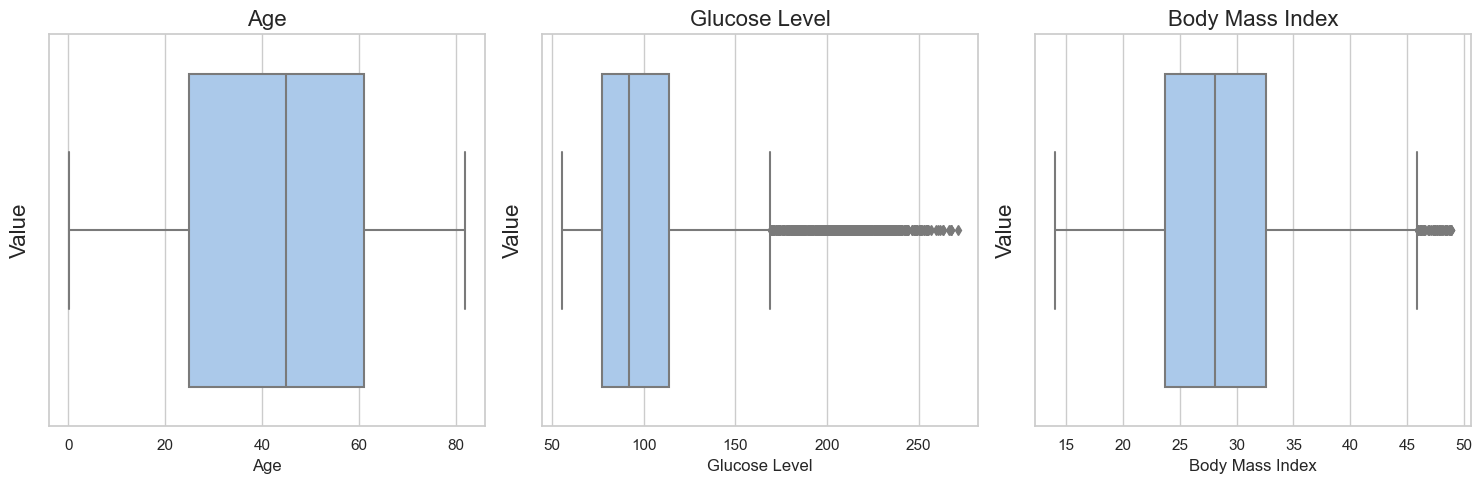

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Define subplot parameters
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate over

# Set the style
sns.set(style="whitegrid")

# Iterate over each numerical column of the dataframe, creating a subplot
for i, col in enumerate(df[num_cols]):
    sns.boxplot(x=col, data=df, ax=axes[i], palette=sns.color_palette('pastel'))

    # Set the title and font size
    axes[i].set_title(col, fontsize=16)

    # Set the label font size for the y-axis
    axes[i].set_ylabel('Value', fontsize=16)

plt.tight_layout()  # Fix layout
plt.show()  # Display subplots

In [19]:
def check_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1 - 1.5*IQR))|(df>(q3 + 1.5*IQR)))]
    return outliers

# Print the number of the outliers in the 3 cols:
for i in range(0, len(num_cols)):
    print(f'The number of the outliers of the {num_cols[i]} column is : {len(check_outliers(df[num_cols[i]]))}')

The number of the outliers of the Age column is : 0
The number of the outliers of the Glucose Level column is : 602
The number of the outliers of the Body Mass Index column is : 43


In [20]:
df_skew = df.skew(axis=0) 
df_skew.sort_values(ascending=False) 

Stroke             4.140942
Heart Disease      3.896191
Hypertension       2.740377
Glucose Level      1.587526
Body Mass Index    0.371553
Age               -0.144001
dtype: float64

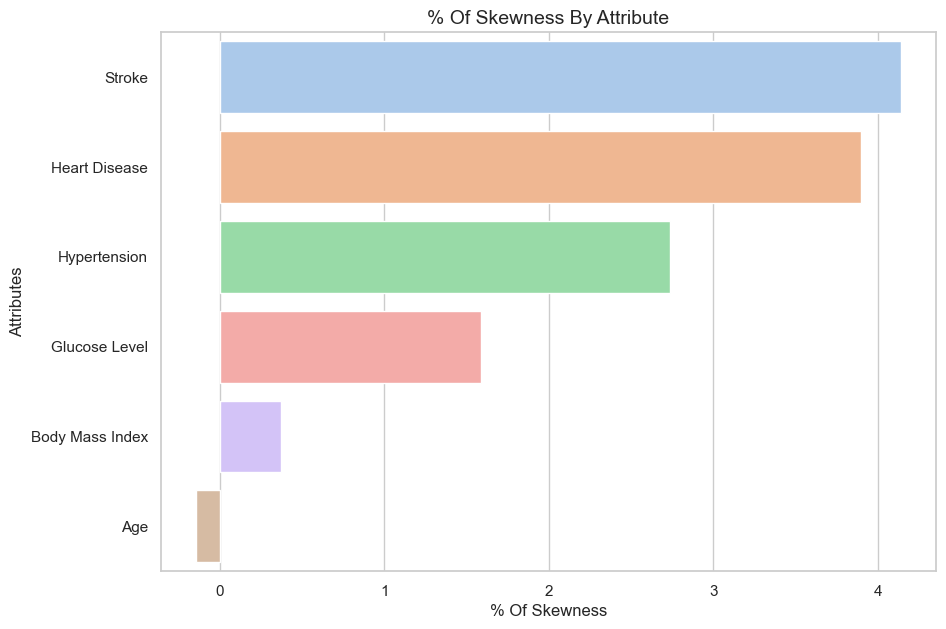

In [21]:
# Define the 'Icefire' color palette
sns.set_palette("pastel")

# Sort the skew values in descending order
df_skew_sorted = df_skew.sort_values(ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 7))
ax = sns.barplot(x=df_skew_sorted.values, y=df_skew_sorted.index, orient="h")

# Customize the plot
plt.title("% Of Skewness By Attribute", fontsize=14)
plt.xlabel("% Of Skewness", fontsize=12)
plt.ylabel("Attributes", fontsize=12)

# Rotate the y-axis labels for better readability
plt.xticks(rotation=0)

plt.show()

## Data Preprocessing - Encoding

In [22]:
l1=LabelEncoder()
df["Gender"]=l1.fit_transform(df["Gender"])
df["Civil Status"]=l1.fit_transform(df["Civil Status"])
df["Type of work"]=l1.fit_transform(df["Type of work"])
df["Residence"]=l1.fit_transform(df["Residence"])
df["Smoking"]=l1.fit_transform(df["Smoking"])

In [23]:
df.head()

Gender   Age  Hypertension  Heart Disease  Civil Status  Type of work  \
0       1  67.0             0              1             1             1   
1       1  80.0             0              1             1             1   
2       0  49.0             0              0             1             1   
3       0  79.0             1              0             1             2   
4       1  81.0             0              0             1             1   

   Residence  Glucose Level  Body Mass Index  Smoking  Stroke  
0          1         228.69             36.6        1       1  
1          0         105.92             32.5        2       1  
2          1         171.23             34.4        3       1  
3          0         174.12             24.0        2       1  
4          1         186.21             29.0        1       1

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4981 non-null   int32  
 1   Age              4981 non-null   float64
 2   Hypertension     4981 non-null   int64  
 3   Heart Disease    4981 non-null   int64  
 4   Civil Status     4981 non-null   int32  
 5   Type of work     4981 non-null   int32  
 6   Residence        4981 non-null   int32  
 7   Glucose Level    4981 non-null   float64
 8   Body Mass Index  4981 non-null   float64
 9   Smoking          4981 non-null   int32  
 10  Stroke           4981 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 330.9 KB


## Correlation among variables

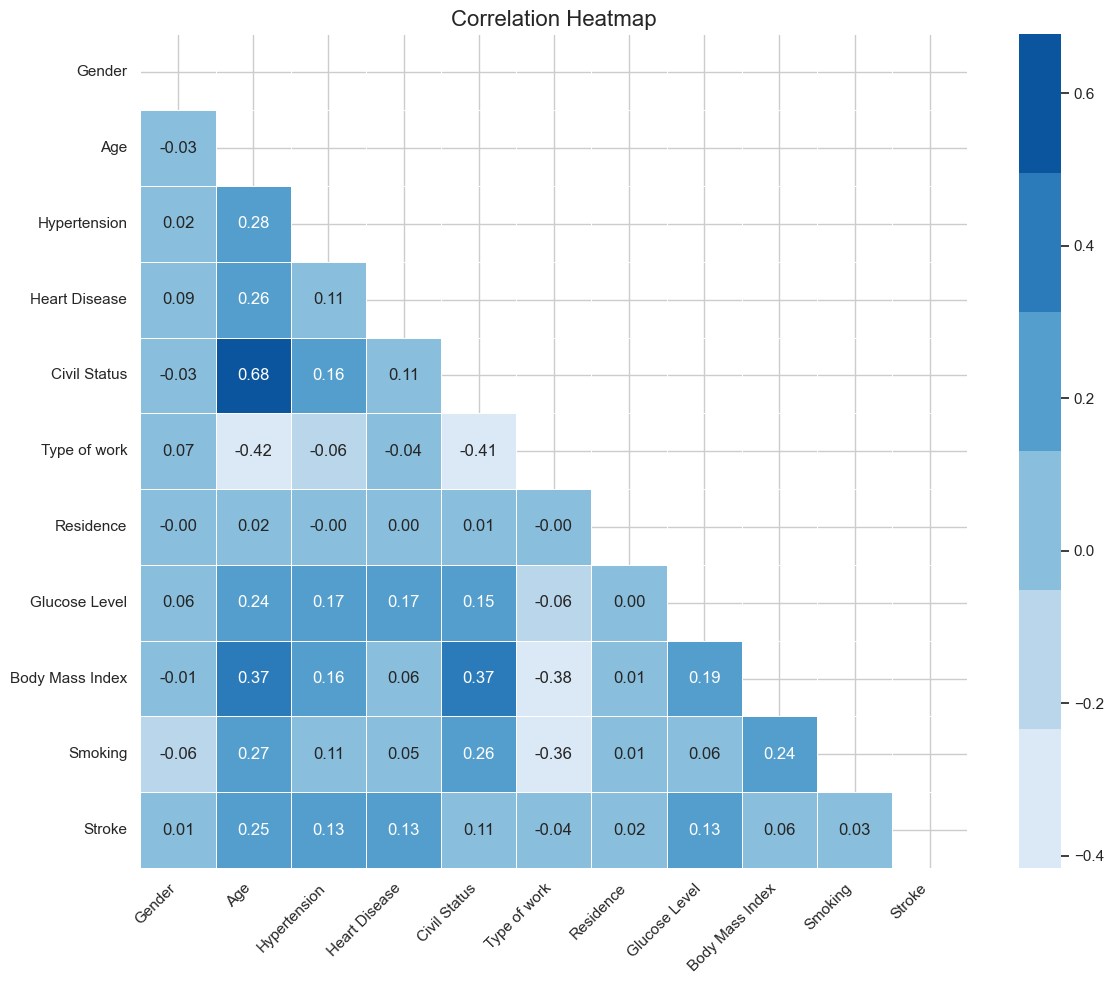

In [25]:
# Set the figure size and create a correlation matrix
plt.figure(figsize=(12, 10))
corr_table = df.corr()

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_table, dtype=bool))

# Define a custom color palette
cmap = sns.color_palette("Blues")

# Create the heatmap
sns.heatmap(corr_table, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5, mask=mask)

# Customize the plot
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

In [26]:
#correlations of variables with target variable 
df.corr()[['Stroke']].sort_values(by='Stroke', ascending=False)

Stroke
Stroke           1.000000
Age              0.246478
Heart Disease    0.134610
Glucose Level    0.133227
Hypertension     0.131965
Civil Status     0.108398
Body Mass Index  0.056926
Smoking          0.027463
Residence        0.016494
Gender           0.008870
Type of work    -0.041835

### The most relevant correlations (> 0.6)

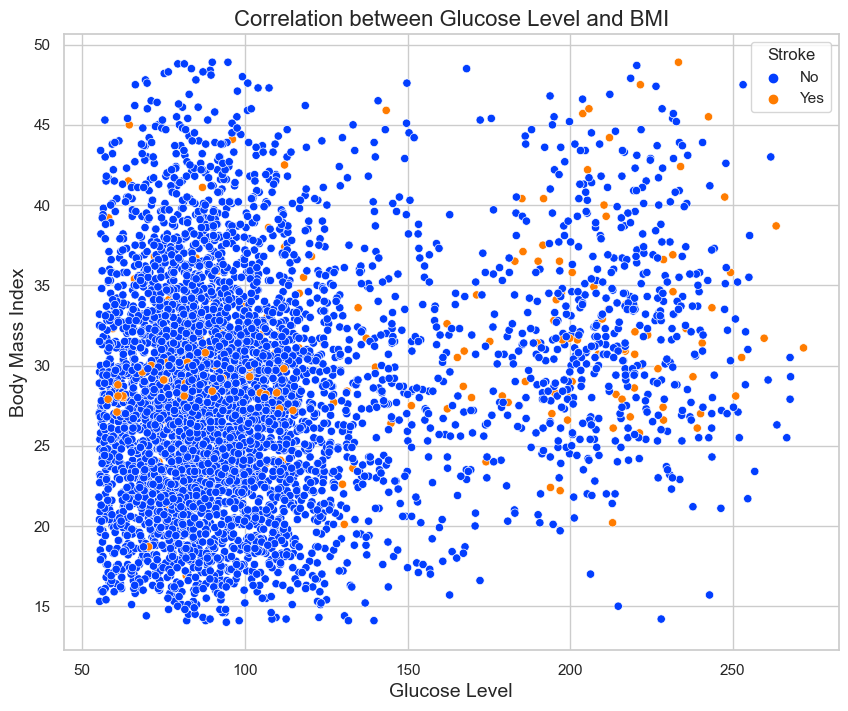

In [27]:
# Set the style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Create the scatterplot
scatterplot = sns.scatterplot(data=df, x="Glucose Level", y="Body Mass Index", hue="Stroke", palette="bright")

# Set labels and title
plt.xlabel("Glucose Level", fontsize=14)
plt.ylabel("Body Mass Index", fontsize=14)
plt.title("Correlation between Glucose Level and BMI", fontsize=16)

# Customize the legend
legend = scatterplot.get_legend()
legend.set_title("Stroke")

# Add a legend title for "Stroke"
scatterplot.get_legend().set_title("Stroke")
scatterplot.get_legend().get_texts()[0].set_text("No")
scatterplot.get_legend().get_texts()[1].set_text("Yes")

plt.show()

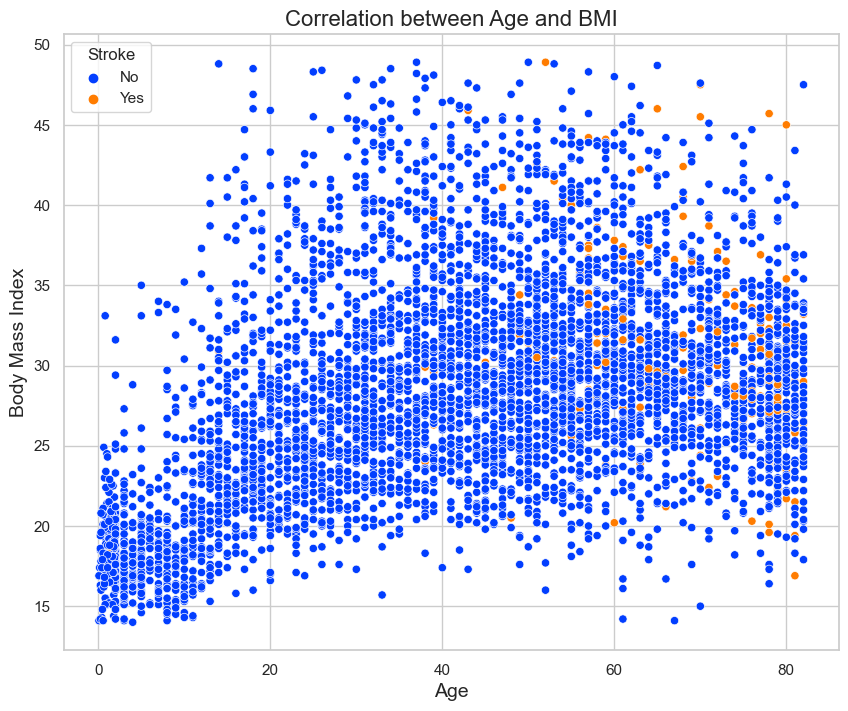

In [28]:
# Set the style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Create the scatterplot
scatterplot = sns.scatterplot(data=df, x="Age", y="Body Mass Index", hue="Stroke", palette="bright")

# Set labels and title
plt.xlabel("Age", fontsize=14)
plt.ylabel("Body Mass Index", fontsize=14)
plt.title("Correlation between Age and BMI", fontsize=16)

# Customize the legend
legend = scatterplot.get_legend()
legend.set_title("Stroke")

# Add a legend title for "Stroke"
scatterplot.get_legend().set_title("Stroke")
scatterplot.get_legend().get_texts()[0].set_text("No")
scatterplot.get_legend().get_texts()[1].set_text("Yes")

plt.show()

## Data Preprocessing - Handling Imbalanced Data

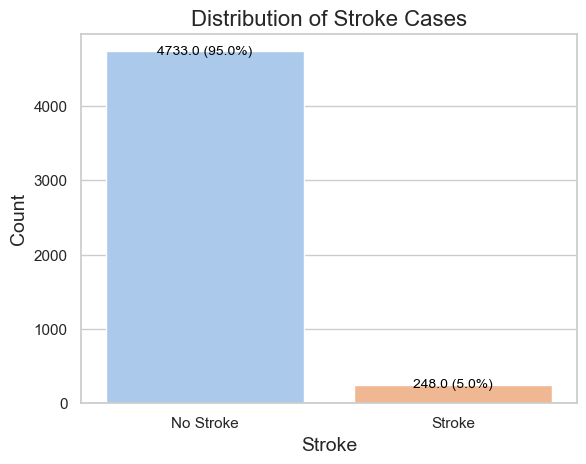

<Figure size 600x200 with 0 Axes>

In [29]:
# Set the style
sns.set(style="whitegrid")

# Create the count plot
countplot = sns.countplot(x="Stroke", data=df, palette="pastel")

# Customize the labels and title
plt.xlabel("Stroke", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Stroke Cases", fontsize=16)

# Set the figure size
plt.figure(figsize=(6, 2))

# Add annotations with the count on top of the bars
total = len(df["Stroke"])
for p in countplot.patches:
    count = p.get_height()
    percentage = 100 * count / total
    countplot.annotate(f'{count} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black')

# Customize the x-axis tick labels
countplot.set_xticklabels(["No Stroke", "Stroke"])

plt.show()

<p>The target variable in my dataset shows a notable class imbalance, with the majority class (No Stroke) accounting for 95% of the data and the minority class (Yes Stroke) accounting for only 5%. Machine learning models may be hampered by this imbalance if they start to anticipate the majority class more favorably, which would result in worse than ideal performance, particularly for the minority class.</p>

<p>No Stroke (Majority Class): 4733 instances (approximately 95%)</p>
<p>Yes Stroke (Minority Class): 248 instances (approximately 5%)</p>

<p>As machine learning models aim to maximize overall accuracy, they frequently exhibit bias towards the majority class. The minority class, who is frequently more interested in applications like stroke prediction, may suffer as a result. Because of its poor representation in the dataset, the model might not be able to learn enough patterns from the minority class.</p>

<p>For your unbalanced dataset, scaling and using SMOTE are essential preparation procedures. In the context of stroke prediction, scaling guarantees that features are scaled similarly, while SMOTE addresses the imbalance in the minority class by creating synthetic samples. Together, these efforts result in a more robust and balanced dataset that can be used to train your predictive model.</p>

In [30]:
df_stroke = pd.DataFrame(df)

In [31]:
# split the dataset into features (X) and target variable (y)
X = df_stroke.drop('Stroke',axis=1)
y = df_stroke['Stroke']

In [32]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3486, 10), (1495, 10), (3486,), (1495,))

In [33]:
# Feature Scaling
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

In [34]:
# apply SMOTE to balance the dataset
sm = SMOTE(sampling_strategy='auto', random_state= 0)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state= 0)
# print the shape of the balanced dataset
print("Shape of balanced dataset:", X_res.shape, y_res.shape)

Shape of balanced dataset: (6606, 10) (6606,)


In [36]:
# Print the shape of training and testing data along with its labels.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5284, 10), (1322, 10), (5284,), (1322,))

<p>I've scaled and used SMOTE (Synthetic Minority Over-sampling Technique) on my dataset for data preprocessing.</p>

<p>Prior to SMOTE and Scaling:</p>

<p>Ten features and 3486 samples made up the original dataset.
3486 samples were included in the training set and 1495 samples in the testing set after the dataset was divided into training and testing sets. There were 1495 labels in the testing set and 3486 labels in the training set for the target variable (output).</p>

<p>After SMOTE and Scaling:</p>

<p>The dataset has undergone preprocessing and has been modified.
There are currently 5284 samples with 10 features in the dataset.
There are currently 5284 samples in the training set and 1322 samples in the testing set, maintaining the split between the two sets. With 5284 labels in the training set and 1322 labels in the testing set, the target variable has also been updated.</p>

## Modeling

### Classification (All Features)

In [37]:
def classification_all_features(Model):
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = model.predict(X_test)
    
    global score
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))
  
    # Printing accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    
    # Making the Confusion Matrix
    print(confusion_matrix(y_test, y_pred))

### Classification with Hyperparameter Tuning (all features)

In [38]:
def classification_tuning_all(regularizator, k=5):
    # Hyperparameter with regularizator
    model_cv = regularizator
    
    # Fitting classifier to the Training set (all features)
    model_cv.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = model_cv.predict(X_test)

    global score 
    # Assign f1 score to a variable
    score = model_cv.score(X_test, y_test)

    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

    # Printing Tuned Model Parameters
    print("Tuned Model Parameters: {}".format(model_cv.best_params_))
    
    # Printing accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # Making the Confusion Matrix
    print(confusion_matrix(y_test, y_pred))
    
    # Perform k-fold cross-validation and print the cross-validation scores
    cross_val_scores = cross_val_score(model_cv, X_train, y_train, cv=k, scoring='f1_macro')
    print(f"{k}-Fold Cross-Validation Scores: {cross_val_scores}")
    print(f"Average {k}-Fold Cross-Validation Score: {cross_val_scores.mean()}")

### Decision Tree

In [39]:
# Function for decision tree classification model with all features
classification_all_features(DecisionTreeClassifier(criterion = 'gini', random_state = 0))

f1 score: 0.9015742698312234
Accuracy: 0.9016641452344932
[[577  86]
 [ 44 615]]


<p>The F1 score, which shows a strong balance between precision and recall, suggests that your Decision Tree model is operating properly. But it's important to take into account the particular needs of your application, particularly if false positives or false negatives have distinct consequences.</p>

In [40]:
#f1 score and accuracy for the model comparison
dtr1 = score
dt1 = 0.90

### Decision Tree (Cross Validation and Hyperparameter Tuning)

In [41]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Function for hyperparameter tuning to decision tree classification with all features
classification_tuning_all(RandomizedSearchCV(DecisionTreeClassifier(random_state = 0), 
                                             param_dist, cv=5, scoring = 'f1_weighted'))

f1 score: 0.8940845760523832
Tuned Model Parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}
Accuracy: 0.8940998487140696
[[600  63]
 [ 77 582]]
5-Fold Cross-Validation Scores: [0.87133293 0.87311697 0.87035029 0.82865017 0.89487043]
Average 5-Fold Cross-Validation Score: 0.867664158344342


<p>These scores show how well the model performed in a 5-fold cross-validation at various folds. Strong performance across several data subsets is indicated by the average cross-validation score of 0.8767.
The model's efficacy appears to have been influenced by the selection of hyperparameters, including entropy as the criterion and particular values for min_samples_split, min_samples_leaf, and max_features.</p>

In [42]:
#f1 score and accuracy for the model comparison
dtr2 = score
dt2 = 0.89

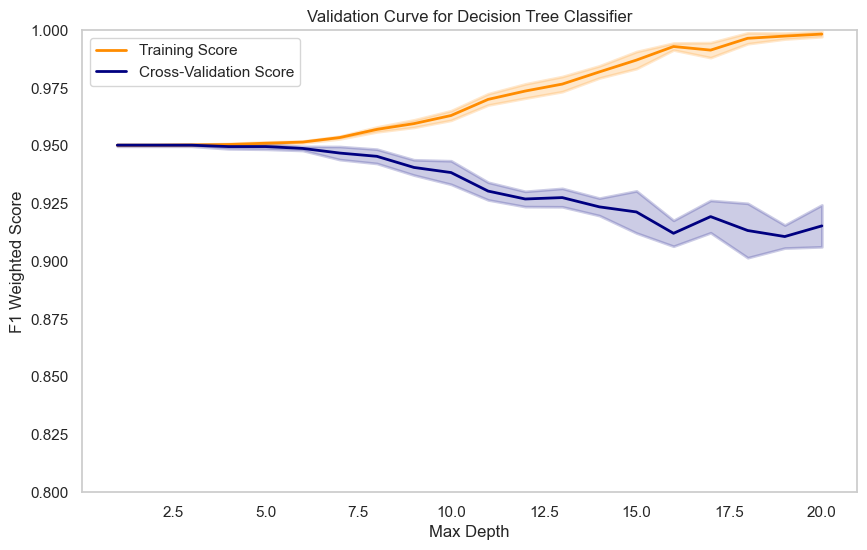

In [43]:
# Define a range of values for 'max_depth'
param_range = np.arange(1, 21)

# Create the DecisionTreeClassifier with tuned parameters
tuned_model = DecisionTreeClassifier(
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    criterion='entropy',
    random_state=0
)

# Calculate the validation curve
train_scores, test_scores = validation_curve(
    tuned_model, X, y, param_name='max_depth', param_range=param_range,
    cv=5, scoring="accuracy")

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve for Decision Tree Classifier")
plt.xlabel("Max Depth")
plt.ylabel("F1 Weighted Score")
plt.ylim(0.8, 1.0)  # Adjust the y-axis limits as needed
lw = 2
plt.plot(param_range, train_scores_mean, label="Training Score", color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-Validation Score", color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)
plt.legend(loc="best")
plt.grid()
plt.show()

<p>The model grows more complicated and begins fitting the training data too closely, capturing noise and outliers, when the decision tree's maximum depth rises above 5. The model is practically memorizing the training data, thus the training score keeps getting better, but the validation score starts to decline. The model struggles to generalize to new, unseen data because it is become too specialized in the training set.</p>
<p>The ideal model complexity is represented as the point when the validation score is maximized (before to it beginning to decrease). It looks like in my situation, the sweet spot for the model's good generalization to both training and validation data without overfitting is around a max depth of about 5.</p>
<p>To prevent overfitting, I might wish to choose a model with a maximum depth of about 5. Past this stage, noise that doesn't improve generalization is probably being captured by the model. This decision tree depth strikes a fair compromise between preventing overfitting and identifying trends in the data.</p>

### Random Forest

In [44]:
# Function for Random Forest Classification model with all features
classification_all_features(RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0))

f1 score: 0.9561267789393031
Accuracy: 0.9561270801815431
[[631  32]
 [ 26 633]]


<p>My Random Forest model is doing incredibly well; it has a high accuracy and F1 score.
Reducing false positives (32 cases) and false negatives (26 cases) is a strength of the model, which is important for a medical prediction task such as stroke classification.</p>

In [45]:
# F1 score and accuracy for the model comparison
rfc1 = score
rf1 = 0.95

### Random Forest (Cross Validation and Hyperparameter Tuning)

In [46]:
random_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Function for hyperparameter tuning to random forest classification with all features
classification_tuning_all(RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 0), 
                                             param_distributions = random_grid, n_iter = 100, cv = 5, 
                                             verbose=2, random_state=0, n_jobs = -1, scoring = 'f1_weighted'))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
f1 score: 0.9591469083374148
Tuned Model Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Accuracy: 0.9591527987897126
[[627  36]
 [ 18 641]]
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
5-Fold Cross-Validation Scores: [0.95173624 0.94322942 0.95173918 0.96782701 0.95265135]
Average 5-Fold Cross-Validation Score: 0.9534366399088169


<p>These scores show how well the model performed in a 5-fold cross-validation at various folds. Strong performance across several data subsets is indicated by the average cross-validation score of 0.9534.
With its hyperparameters adjusted, my Random Forest model is operating remarkably well, attaining a high F1 score and accuracy.
For a medical prediction task like stroke classification, the model shows strength in both limiting false positives (36 cases) and false negatives (18 instances).</p>

In [47]:
# F1 score and accuracy for the model comparison
rfc2 = score
rf2 = 0.95

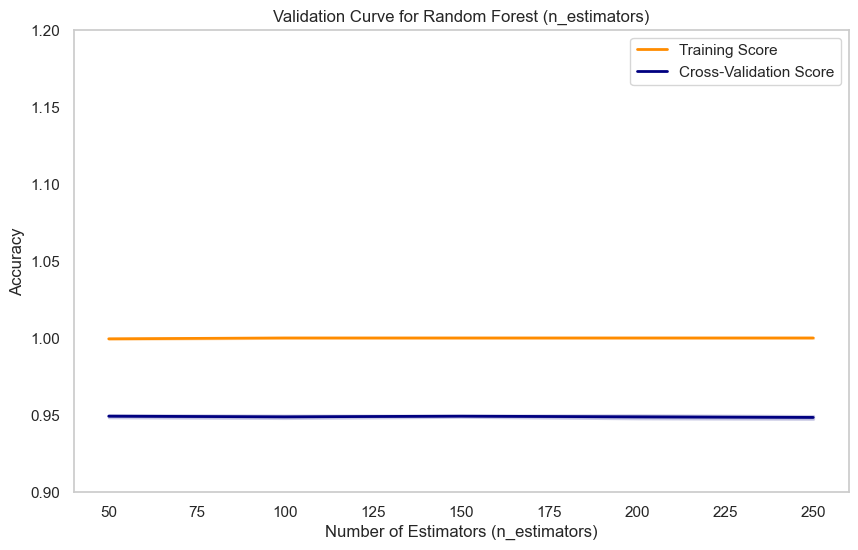

In [48]:
# Define a range of values for the number of trees (n_estimators)
param_range = [50, 100, 150, 200, 250]  # Adjust as needed

# Create a RandomForestClassifier with your preferred parameters
rf_model = RandomForestClassifier(
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=None,
    random_state=0
)

# Calculate the validation curve
train_scores, test_scores = validation_curve(
    rf_model, X, y, param_name="n_estimators", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1
)

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve for Random Forest (n_estimators)")
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.2)  # Adjust the y-axis limits as needed
lw = 2
plt.plot(param_range, train_scores_mean, label="Training Score", color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-Validation Score", color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)
plt.legend(loc="best")
plt.grid()
plt.show()

<p>It indicates that my Random Forest model is probably overfitting the training data when you have a situation where the training accuracy is consistently at 1.0 (100%) and the validation accuracy is also consistently high but somewhat lower.</p>
<p>The model's performance is not greatly affected by altering the number of estimators (trees in the forest), as seen by the straight lines in my validation and training accuracies. Perhaps my model is already sufficiently sophisticated with a small number of estimators, so adding more won't make a big difference.</p>
<p>I should try experimenting with my Random Forest's level of intricacy. This could entail tweaking other hyperparameters, restricting the depth of each tree, or lowering the number of estimators. </p>

### KNN

In [49]:
# Function for K-NN classification with all features
classification_all_features(KNeighborsClassifier())

f1 score: 0.8932498277791636
Accuracy: 0.8940998487140696
[[533 130]
 [ 10 649]]


<p>The F1 score shows that the KNN model offers a fair trade-off between recall and precision.
With an accuracy of 89.41%, the model appears to be correctly predicting the majority of the cases.</p>

In [50]:
# F1 score and accuracy for the model comparison
knn1 = score
kn1 = 0.89

### KNN (Cross Validation and Hyperparameter Tuning)

In [51]:
# Set up parameters
param_grid={
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Function for hyperparameter tuning to K-NN classification with all features
classification_tuning_all(GridSearchCV(KNeighborsClassifier(), 
                                       param_grid, cv = 5, scoring = 'f1_weighted'))

f1 score: 0.934794400213541
Tuned Model Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Accuracy: 0.9349470499243571
[[587  76]
 [ 10 649]]
5-Fold Cross-Validation Scores: [0.92210899 0.93259685 0.93455009 0.92003674 0.92687027]
Average 5-Fold Cross-Validation Score: 0.9272325881008797


<p>The adjusted KNN model is operating accurately and with a high F1 score.
For the provided dataset, the selected hyperparameters appear to be effective.
The model appears to have good cross-validation results across several data subsets.</p>

In [52]:
# F1 score and accuracy for the model comparison
knn2 = score
kn2 = 0.93

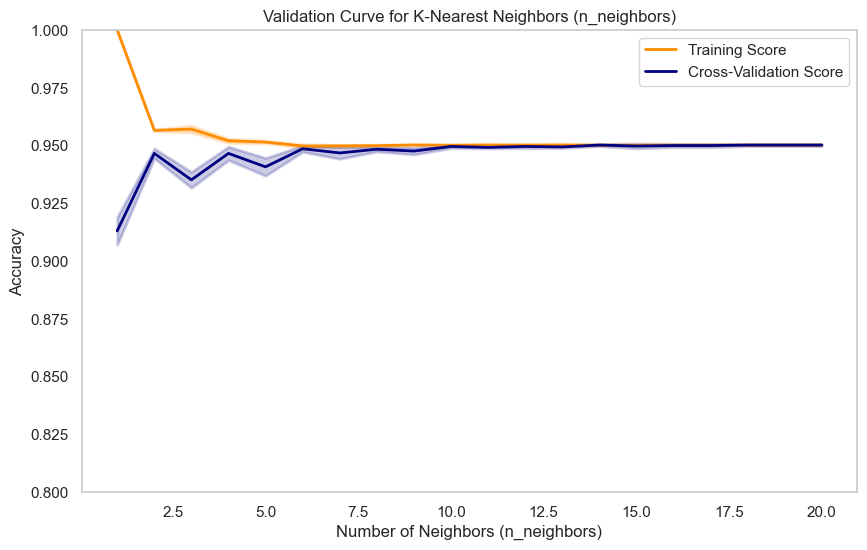

In [53]:
# Define a range of values for the number of neighbors (K)
param_range = np.arange(1, 21)  # Adjust the range as needed

# Create a KNeighborsClassifier with your preferred parameters
knn_model = KNeighborsClassifier()

# Calculate the validation curve
train_scores, test_scores = validation_curve(
    knn_model, X, y, param_name="n_neighbors", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1
)

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve for K-Nearest Neighbors (n_neighbors)")
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)  # Adjust the y-axis limits as needed
lw = 2
plt.plot(param_range, train_scores_mean, label="Training Score", color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-Validation Score", color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)
plt.legend(loc="best")
plt.grid()
plt.show()

<p>The model may have reached its ideal complexity if the training and validation scores stay the same after a given number of neighbors. In a KNN, more neighbors can smooth out the decision boundary and increase the model's robustness, whereas fewer neighbors may result in a more flexible (and possibly overfit) model.</p>
<p>When my model performs effectively in generalizing to new data without overfitting the training set, it has the ideal number of neighbors. It strikes a compromise between preventing noise and capturing regional patterns. It appears that a moderate number of neighbors—roughly five/six—is offering the finest balance in your situation.</p>
<p>The behavior I am seeing may be a sign that your KNN model has reached an ideal complexity at which point it performs effectively when applied to fresh data. Experimenting with various hyperparameter settings is a fantastic way to make sure I have the optimal model for your particular dataset.</p>

### Logistic Regression

In [54]:
# Function for logistic regression with all features
classification_all_features(LogisticRegression(random_state = 0))

f1 score: 0.7815363466127258
Accuracy: 0.7821482602118003
[[483 180]
 [108 551]]


<p>The accuracy and F1 score of the logistic regression model are moderate.
The threshold selected to categorize events as good or negative could have an effect on how well memory and precision are balanced.</p>

In [55]:
# F1 score and accuracy for the model comparison
lrg1 = score
lr1 = 0.78

### Logistic Regression (Cross Validation and Hyperparameter Tuning)

In [56]:
# Set up parameters
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Function for hyperparameter tuning to logistic regression with all features
classification_tuning_all(GridSearchCV(LogisticRegression(random_state = 0), 
                                       param_grid, cv=5, scoring = 'f1_weighted'))

f1 score: 0.78372206004193
Tuned Model Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7844175491679274
[[482 181]
 [104 555]]
5-Fold Cross-Validation Scores: [0.7760754  0.78944223 0.77379037 0.77523653 0.79223635]
Average 5-Fold Cross-Validation Score: 0.7813561776051072


<p>The accuracy and F1 score of the logistic regression model with hyperparameter adjustment are acceptable.
The selection of 0.1 as the regularization parameter and L1 regularization point to a preference for sparsity in the model coefficients.
The model's stability is supported by the 5-fold cross-validation scores, which show constant performance over folds.</p>

In [57]:
# F1 score and accuracy for the model comparison
lrg2 = score
lr2 = 0.78

### SVM

In [58]:
# Function for SVM classifier with all features
classification_all_features(SVC(kernel = 'linear', random_state = 0))

f1 score: 0.7802578313610528
Accuracy: 0.7813918305597579
[[470 193]
 [ 96 563]]


<p>Based on accuracy and F1 score, the SVM model performs rather well.
The model's capacity to correctly classify cases into multiple classes is revealed by the confusion matrix.</p>

In [59]:
# F1 score and accuracy for the model comparison
svm1 = score
sv1 = 0.78

### SVM (Cross Validation and Hyperparameter Tuning)

In [60]:
# Specify the hyperparameter space
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}

# Function for hyperparameter tuning to SVM classification with all features
classification_tuning_all(GridSearchCV(SVC(kernel='linear'), param_grid, 
                                       cv = 5, scoring = 'f1_weighted'))

f1 score: 0.7787849485976148
Tuned Model Parameters: {'C': 10, 'gamma': 0.001}
Accuracy: 0.7798789712556732
[[470 193]
 [ 98 561]]
5-Fold Cross-Validation Scores: [0.77387082 0.78429522 0.78125647 0.77982488 0.79474702]
Average 5-Fold Cross-Validation Score: 0.7827988802032535


<p>Based on the F1 score and accuracy, the SVM model performs reasonably with adjusted parameters.
The model's capacity to correctly classify cases into multiple classes is revealed by the confusion matrix.
Scores obtained by cross-validation show consistent performance amongst various training data subsets.</p>

In [61]:
# F1 score and accuracy for the model comparison
svm2 = score
sv2 = 0.77

## Evaluation

### Comparing F1 scores

In [62]:
# Dictionary of model f1 scores to compare
results={'Logistic Regression': [lrg1, lrg2], 
         'Decision Tree': [dtr1, dtr2], 
         'Random Forest': [rfc1, rfc2], 
         'KNN': [knn1, knn2], 
         'SVM': [svm1, svm2]} 

In [63]:
# Creating model comparison dataframe
comparison = pd.DataFrame.from_dict(results, orient='index')
comparison.columns = ['all_features', 'tuned_all_features']

In [64]:
# Computing the total improvement on the f1 score

list1 = []
for i in comparison.index:
    d = max(comparison.all_features[i], comparison.tuned_all_features[i])
    e = (d / comparison.all_features[i]) - 1
    list1.append(float("%.4f" % e))

comparison['Total Improvement(%)'] = list1

In [65]:
# Models Compare List
comparison

all_features  tuned_all_features  Total Improvement(%)
Logistic Regression      0.781536            0.783722                0.0028
Decision Tree            0.901574            0.894085                0.0000
Random Forest            0.956127            0.959147                0.0032
KNN                      0.893250            0.934794                0.0465
SVM                      0.780258            0.778785                0.0000

<p>The F1 scores for various models are shown in the table both before and after hyperparameter adjustment.
After tuning, Decision Tree and KNN demonstrate notable gains in performance.
Random Forest and Logistic Regression show a little improvement.
SVM doesn't become much better after adjusting.</p>

### Comparing Accuracies

In [66]:
# Dictionary of model accuracies to compare
results2={'Logistic Regression': [lr1, lr2], 
         'Decision Tree': [dt1, dt2], 
         'Random Forest': [rf1, rf2], 
         'KNN': [kn1, kn2], 
         'SVM': [sv1, sv2]}  

In [67]:
# Creating model comparison dataframe
comparison2 = pd.DataFrame.from_dict(results2, orient='index')
comparison2.columns = ['all_features', 'tuned_all_features']

In [68]:
# Computing the total improvement on the accuracies

list2 = []
for i in comparison2.index:
    d = max(comparison2.all_features[i], comparison2.tuned_all_features[i])
    e = (d / comparison2.all_features[i]) - 1
    list2.append(float("%.4f" % e))

comparison2['Total Improvement(%)'] = list2

In [69]:
# Models Compare List
comparison2

all_features  tuned_all_features  Total Improvement(%)
Logistic Regression          0.78                0.78                0.0000
Decision Tree                0.90                0.89                0.0000
Random Forest                0.95                0.95                0.0000
KNN                          0.89                0.93                0.0449
SVM                          0.78                0.77                0.0000

<p>The accuracy scores for several models are shown in the table both before and after hyperparameter adjustment.
KNN exhibits a notable increase in accuracy upon tuning.
SVM and Decision Tree show marginal drops in accuracy.
After adjusting, neither Random Forest nor Logistic Regression exhibit any change in accuracy.</p>

## Conclusion

<p>In this project, we use the CRISP-DM methodology to organize and structure the stages to develop supervised learning models that help us use different patient variables to predict whether or not they could suffer a stroke.</p>
<p>By means of an extensive analysis of several demographic and health-related characteristics, we discovered fascinating trends and plausible risk factors. The gender distribution of the dataset showed that women made up a larger proportion and that their percentage of stroke victims was somewhat higher. One key component that showed promise was marital status, suggesting that there may be a relationship between marriage and the chance of having a stroke. Interesting trends were also seen in occupational patterns, where the risk of stroke varied depending on the type of job.</p>
<p>Notably, established ideas about the roles of hypertension and heart disease status as risk factors for stroke occurrences were challenged by the lack of obvious patterns regarding these conditions' involvement. Nonetheless, the examination of glucose levels revealed a distinct upward trend in the risk of stroke with rising glucose levels. The Body Mass Index (BMI) study, especially in the overweight and obese ranges, further supported the association between higher BMI values and a higher risk of strokes.</p>
<p>We were able to evaluate their performance in stroke prediction by the use of machine learning techniques for predictive modeling, such as Decision Tree, Random Forest, KNN, Logistic Regression, and SVM. The F1 scores for KNN and Decision Tree were significantly raised by hyperparameter tuning, highlighting the importance of parameter optimization in raising model efficacy. SVM, on the other hand, showed just a slight improvement, demonstrating its tolerance for hyperparameter changes.</p>
<p>In conclusion, our machine learning effort offers the stroke community and medical professionals a useful tool for identifying high-risk individuals and making better-educated decisions regarding stroke prevention and early intervention techniques, perhaps saving many lives.</p>


## References

Alaka, S.A., Menon, B.K., Brobbey, A., Williamson, T., Goyal, M., Demchuk, A.M., Hill, M.D., Sajobi, T.T., 2020. Functional Outcome Prediction in Ischemic Stroke: A Comparison of Machine Learning Algorithms and Regression Models. Front Neurol 11, 889. https://doi.org/10.3389/fneur.2020.00889

Barthels, D., Das, H., 2020. Current advances in ischemic stroke research and therapies. Biochim Biophys Acta Mol Basis Dis 1866, 165260. https://doi.org/10.1016/j.bbadis.2018.09.012

Dev, S., Wang, H., Nwosu, C.S., Jain, N., Veeravalli, B., John, D., 2022. A predictive analytics approach for stroke prediction using machine learning and neural networks. Healthcare Analytics 2, 100032. https://doi.org/10.1016/j.health.2022.100032

Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. O'Reilly Media, Inc.

Guzik, A., Bushnell, C., 2017. Stroke Epidemiology and Risk Factor Management. Continuum (Minneap Minn) 23, 15–39. https://doi.org/10.1212/CON.0000000000000416

Prabhakaran, S., Chong, J.Y., 2014. Risk factor management for stroke prevention. Continuum (Minneap Minn) 20, 296–308. https://doi.org/10.1212/01.CON.0000446102.82420.64

Raschka, S., & Mirjalili, V. (2020). Python Machine Learning, Third Edition. Packt Publishing Ltd.

Yoo, I., Alafaireet, P., Marinov, M., Pena-Hernandez, K., Gopidi, R., Chang, J.-F., Hua, L., 2012. Data Mining in Healthcare and Biomedicine: A Survey of the Literature. Journal of Medical Systems 36, 2431–2448. https://doi.org/10.1007/s10916-011-9710-5

Gravetter, F.J. and Wallnau, L.B. (2017). Statistics for the behavioral sciences. 10th ed. Boston, Ma Cengage Learning.
